**Импортируем необходимые библиотеки**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR, LinearSVR


**Проведем первичный анализ данных**

In [70]:
train_data = pd.read_excel("train.xlsx")
test_data = pd.read_excel("test.xlsx")

display(train_data.head())
display(test_data.head())

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667


,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,Ученое звание 1,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories
0,0,matematika,Репетитор по математике Тихонова Наталья Бори...,"['Школьная программа', 'Подготовка к ЕГЭ', 'Ан...",4,13,Дистанционное убучение по Skype с прим...,NaN,Петрозаводский государственный университет,"Год окончания: 1981, Факультет: физико-матема...",...,NaN,Частный преподаватель,26 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
1,1,matematika,Репетитор по математике Худайбердина Милана Р...,"['Школьная программа', 'Математический анализ'...",0,0,Буду рада помочь в освоении дисциплин ...,NaN,"Национальный исследовательский университет ""В...","Год окончания: 2022, Факультет: Московский ин...",...,NaN,Студент,4 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п..."
2,2,matematika,Репетитор по математике Епихина Елена Вячесла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0,0,Преподаватель высшей квалификационный ...,Репетитор не предоставил информаци...,"Тамбовский ордена ""Знак Почёта"" государственн...","Год окончания: 1987, Факультет: Математика, С...",...,NaN,"Университетский преподаватель, Школьный препо...",36 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."
3,3,matematika,Репетитор по математике Касаткин Денис Евгень...,"['Школьная программа', 'Подготовка к ОГЭ', 'Hi...",4,11,"Объясняю ровно столько, сколько надо. ...",NaN,Тюменский государственный университет,"Год окончания: 2022, Факультет: факультет меж...",...,NaN,Студент,3 года,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по..."
4,4,informatika,Репетитор по информатике Логвинов Артём Алекса...,['Подготовка к ЕГЭ'],0,0,"Подготовлю к ЕГЭ, уроки через любую уд...",Репетитор не предоставил информаци...,РТУ МИРЭА,"Год окончания: 2026, Факультет: Программная и...",...,NaN,Студент,1 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 10 по 11 класс, студенты колледж..."


In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1516 non-null   int64  
 1   предмет           1516 non-null   object 
 2   ФИО               1516 non-null   object 
 3   tutor_head_tags   1516 non-null   object 
 4   tutor_rating      1516 non-null   int64  
 5   tutor_reviews     1516 non-null   int64  
 6   description       1515 non-null   object 
 7   experience_desc   757 non-null    object 
 8   Education_1       1516 non-null   object 
 9   Desc_Education_1  1498 non-null   object 
 10  Education_2       286 non-null    object 
 11  Desc_Education_2  285 non-null    object 
 12  Education_3       34 non-null     object 
 13  Desc_Education_3  34 non-null     object 
 14  Education_4       3 non-null      object 
 15  Desc_Education_4  3 non-null      object 
 16  Ученая степень 1  20 non-null     object 


Проверим пропуски

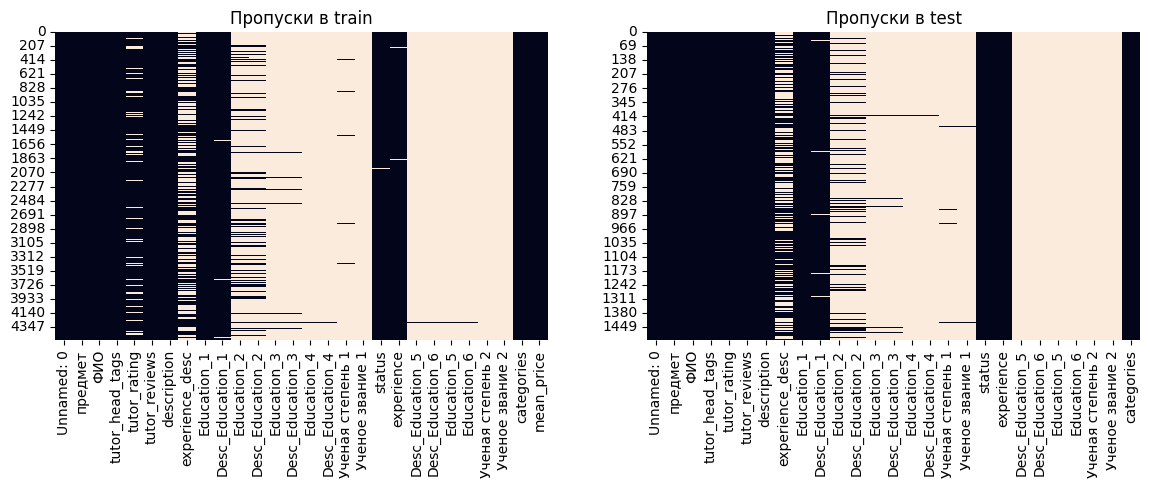

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.heatmap(train_data.isna(), cbar=False, ax=axes[0])
axes[0].set_title('Пропуски в train')
sns.heatmap(test_data.isna(), cbar=False, ax=axes[1])
axes[1].set_title('Пропуски в test')
plt.show()


Распределение целевой переменной

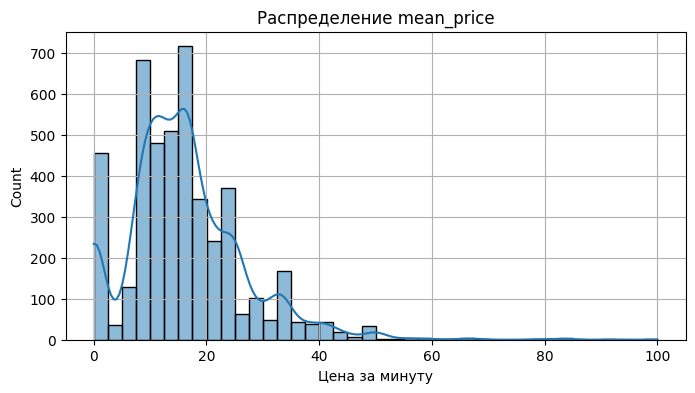

In [74]:
plt.figure(figsize=(8, 4))
sns.histplot(train_data['mean_price'], bins=40, kde=True)
plt.title("Распределение mean_price")
plt.xlabel("Цена за минуту")
plt.grid(True)
plt.show()


Удалим неинформативные колонки и аномалии в целевой переменной, а также закодируем категориальные признаки.

In [75]:
train_data = train_data[train_data['mean_price'] >= 1].copy()

train_data['split'] = 'train'
test_data['split'] = 'test'
test_data['mean_price'] = np.nan

full_data = pd.concat([train_data, test_data])

# Опыт в число
full_data['experience'] = full_data['experience'].fillna('0 лет')
full_data['experience'] = full_data['experience'].apply(lambda x: int(str(x).split()[0]))

# Средний рейтинг
full_data['tutor_rating'] = full_data['tutor_rating'].fillna(full_data['tutor_rating'].median())

# Количество образований
edu_cols = [col for col in full_data.columns if "Education_" in col and "Desc" not in col]
full_data['edu_count'] = full_data[edu_cols].notnull().sum(axis=1)

# Длина описания и опыта
full_data['desc_len'] = full_data['description'].fillna('').apply(len)
full_data['expdesc_len'] = full_data['experience_desc'].fillna('').apply(len)

# Кол-во тэгов
full_data['tags_count'] = full_data['tutor_head_tags'].apply(
    lambda x: len(eval(x)) if isinstance(x, str) and x.startswith("[") else 0
)

Заполним пропуски в категориальных колонках значением "Unknown"

In [76]:
for col in full_data.select_dtypes(include='object').columns:
    if col not in ['split', 'description', 'experience_desc', 'tutor_head_tags']:
        full_data[col] = full_data[col].fillna("Unknown")
        full_data[col] = LabelEncoder().fit_transform(full_data[col])

Также применим One-hot энкодинг для колонок 'предмет' и 'status'

In [77]:
full_data = pd.get_dummies(full_data, columns=['предмет', 'status'], drop_first=True)

Теперь удалим лишнее - тексты, описания и идентификаторы, а также, колонки с образованием, которые были заменены

In [78]:
drop_cols = ['ФИО', 'description', 'experience_desc', 'categories',
             'tutor_head_tags'] + \
            [col for col in full_data.columns if 'Desc_Education' in col] + \
            edu_cols

full_data.drop(columns=drop_cols, inplace=True, errors='ignore')


Разделим данные на обучающие и тестовые после единой предобработки и маштабируем признаки

In [79]:
X_train = full_data[full_data['split'] == 'train'].drop(columns=['mean_price', 'split'])
y_train = full_data[full_data['split'] == 'train']['mean_price']
X_test = full_data[full_data['split'] == 'test'].drop(columns=['mean_price', 'split'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Для обучения все готово - выберем для сравнения 2 модели (SVR и LinearSVR). Воспользуемся метрикой MSE для оценки и кросс-валидацией.

In [80]:
models = {
    "SVR": SVR(C=10, epsilon=0.1),
    "LinearSVR": LinearSVR(max_iter=10000)
}

for name, model in models.items():
    mse_scores = -cross_val_score(model, X_train_scaled, y_train,
                                   scoring='neg_mean_squared_error', cv=10)
    print(f"{name} | Средняя MSE: {mse_scores.mean():.2f}")


SVR | Средняя MSE: 63.54
LinearSVR | Средняя MSE: 72.84


SVR показала лучший результат, подберем параметры для нее

In [81]:
param_grid = {
    "C": [1, 10, 30],
    "epsilon": [0.01, 0.1],
    "kernel": ["rbf"]
}

search = GridSearchCV(SVR(), param_grid, cv=10,
                      scoring='neg_mean_squared_error', n_jobs=-1)
search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", search.best_params_)
print("Средняя MSE (CV):", -search.best_score_)


Лучшие параметры: {'C': 30, 'epsilon': 0.1, 'kernel': 'rbf'}
Средняя MSE (CV): 62.21583474312918


 Предсказание и сохранение результатов:

In [82]:
y_pred = search.best_estimator_.predict(X_test_scaled)

submission = pd.DataFrame({
    "index": range(len(y_pred)),
    "mean_price": y_pred
})

submission.to_csv("submission.csv", index=False)


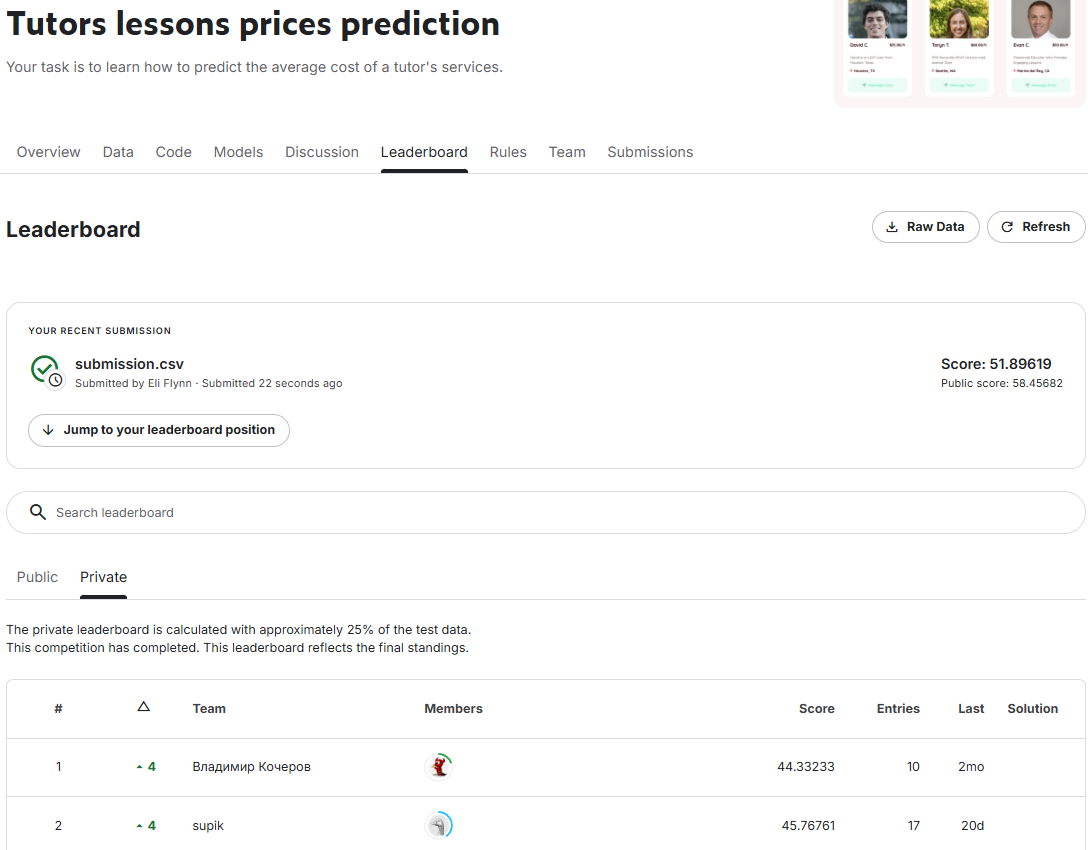

Score: 51.89619
Public score: 58.45682

(В таблицу не попал, т.к. загрузил после дд соревнования)